In [1]:
import os
from spacepy import pycdf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading in the CDF and printing the properties
flux_e1 = pycdf.CDF('wi_sfsps_3dp_20021019211017_20021019215953 (1).cdf')
print(flux_e1)

ENERGY: CDF_FLOAT [124, 7]
ENERGY_filled: CDF_FLOAT [124, 7]
Epoch: CDF_EPOCH [124]
FLUX: CDF_FLOAT [124, 7]
FLUX_SIMPLE: CDF_FLOAT [124, 7]
metavar0: CDF_CHAR*27 [7] NRV
metavar1: CDF_CHAR*24 [7] NRV


In [3]:
#converting the 1st line of flux into a string, this is corresponding to the lowest energy
fluxes1=np.zeros(7)
background1=np.zeros(7)
for i in range(7):
    f=flux_e1['FLUX'][:,i] # the ith row of the flux
    f_corr=f[1:(len(f)-1)] # to get rid of the two [] symbols in the end (an error while reading in)
    fluxes1[i]=max(f_corr) # finding the maximum flux value number/(cm^2*ster*eV*s)
    background1[i]=np.average(f[0:30]) #calculating the average background before the event

In [4]:
energies1=flux_e1['ENERGY'][1] #the 7 energy values, channels
energies1_keV= np.true_divide(energies1,1000) #changing eV to keV
fluxes1_corr=fluxes1-background1 #substracting the background

In [16]:
#finding the best fit for the log-log scale plot, source:https://stackoverflow.com/questions/43837179/best-fit-line-on-log-log-scales-in-python-2-7
m1, b1=np.polyfit(np.log(energies1_keV[0:4]), np.log(fluxes1_corr[0:4]), 1) #finding a linear fit to the log of energy vs log of flux
log_y_fit1 = m1*np.log(energies1_keV[0:4]) + b1 #from the obtained m, b values the log values of the best fit points are obtained
y_fit1 = np.exp(log_y_fit1) #taking the exponential of the log values
#redoing the whole thing for the second half of the vector as there is a break in the middle
m2, b2=np.polyfit(np.log(energies1_keV[3:7]), np.log(fluxes1_corr[3:7]), 1)
log_y_fit2 = m2*np.log(energies1_keV[3:7]) + b2
y_fit2 = np.exp(log_y_fit2)
print(m1)
print(m2)

-1.2735343168409468
-3.2028393786794602


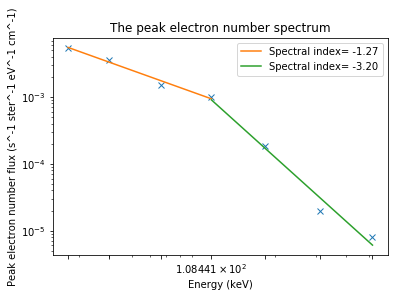

In [20]:
#plotting the peak number flux against the energies
plt.plot(energies1_keV,fluxes1_corr,'x')
#plotting the best fits
plt.plot(energies1_keV[0:4],y_fit1, label='Spectral index= -1.27')
plt.plot(energies1_keV[3:7],y_fit2, label='Spectral index= -3.20')
plt.yscale('log') #setting the log scales on the axes
plt.xscale('log')
plt.xticks(np.true_divide(energies1,1000))
plt.title('The peak electron number spectrum')
plt.ylabel('Peak electron number flux (s^-1 ster^-1 eV^-1 cm^-1)')
plt.xlabel('Energy (keV)')
plt.legend()